## Minería de Datos (Master en Data Science, UIMP-UC) 
## Tarea 2. Problemas de Clasificación - Reducción de la Dimensión
### [Profesores: Steven Van Vaerenbergh, Rodrigo G. Manzanas, Joaquín Bedia y Sixto Herrera]

### Estudiante: Nicolò Trevisani

En la presente tarea consideraremos el dataset `meteo.csv`, que podéis descargaros en el GitHub dedicado a este Máster ([meteo.csv](https://github.com/SantanderMetGroup/Master-Data-Science/blob/master/Data_mining/datasets/meteo.csv.)) y que ha sido utilizado en diferentes sesiones prácticas. Dicho dataset contiene en la primera columna el valor de precipitación observado en Lisboa en el periodo 1979-2008 mientras que en las restantes contiene los valores observados de diferentes variables atmosféricas en 40 puntos que cubren aproximadamente la Península Ibérica. Dichas variables serán los `predictores` del modelo mientras que la precipitación será nuestra variable objetivo. En particular los predictores son:

* Altura geopotencial en 500 hPa (columnas 2:41),
* Temperatura del aire en 850 hPa (columnas 42:81), 700 hPa (columnas 82:121) y 500 hPa (columnas 122:161), 
* Temperatura del aire en superficie (columnas 162:201),
* Humedad específica del aire en 850 hPa (columnas 202:241) y 500 hPa (columnas 242:281) y 
* Presión al nivel del mar (columnas 282:321)

Para establecer el problema de clasificación consideraremos dos umbrales de discretización, 1 mm y 20 mm, que definen la ocurrencia de precipitación (Wet days) y de precipitaciones intensas (Very heavy precipitation days), respectivamente. Puedes consultar más detalles de la definición en la web de [ECA&D](https://www.ecad.eu//indicesextremes/indicesdictionary.php).

Para el desarrollo de la tarea se permitirá el uso de todo el material incluido en el Moodle de las asignatura así como el desarrollado por el alumno durante la realización de las prácticas.

La entrega consisitirá de un notebook de Jupyter ó un R-MarkDown, junto con el archivo html que éste genera. Ambos ficheros se entregarán a través del Moodle de la asignatura en la tarea correspondiente.

### Punto 1 (3 puntos):

En esta primera parte de la tarea trataremos de ilustrar parte de los problemas reflejados en las sesiones teórico-prácticas planteando diferentes experimentos con el dataset `meteo.csv`.
En primer lugar, considerar el dataset completo incluyendo tanto las variables predictoras como la variable objetivo. Por un lado, calculad las componentes principales con y sin estandarización (`Nota:` consultar la ayuda de la función scale -> `? scale`):

* ¿Cómo contribuye en cada caso la variable objetivo a la primera componente principal?
* ¿A qué componente principal contribuye principalmente la variable objetivo? ¿qué porcentaje de varianza se explica hasta dicha componente?
* En base a los puntos anteriores, ¿puede considerarse en alguno de los casos que la variable objetivo se "eliminaría" del modelo debido a su contribución a cada una de las componentes principales?
* ¿Cómo se distribuye la contribución de las diferentes variables del espacio original a la primera componente principal? En caso de no estandarizar, ¿puede inferirse alguna relación entre el rango de las variables y su contribución a la primera componente principal?

`Nota 1:` en principio es posible trabajar con el dataset completo sin seleccionar un subconjunto pero si surge algún problema de memoria podéis considerar únicamente los primeros 10 años (~3650 filas).

`Nota 2:` usad las herramientas gráficas vistas durante la práctica para ilustrar los resultados y las conclusiones obtenidas.

## Desarrollo Punto 1

In [ ]:
# Cargo el dataset
meteo <- read.csv("meteo.csv", row.name = 1)

In [2]:
# Pinto las primeras lineas
head(meteo)

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10.9,57042.96,56534.84,55884.40,55175.59,54458.21,56980.27,56460.59,55800.02,55051.15,⋯,101985.9,101627.3,101357.2,101110.7,101291.0,101814.9,101479.4,101164.5,100970.7,100905.3
2,0.6,56963.20,56493.45,55930.82,55340.20,54768.63,56856.57,56361.95,55776.76,55164.26,⋯,102048.1,102069.7,102204.5,102480.3,102858.8,101973.3,102033.3,102165.5,102323.9,102534.2
3,13.0,56522.59,55971.40,55304.34,54498.03,53725.15,56514.84,55977.71,55327.28,54569.78,⋯,102399.1,102448.4,102438.3,102434.3,102339.8,102669.7,102565.5,102530.3,102453.6,102487.1
4,0.0,54627.98,53979.80,53494.05,53072.98,52616.36,54776.17,54089.05,53516.98,53012.86,⋯,100970.0,100672.8,100360.7,100133.7,100028.4,101126.2,100700.0,100381.3,100118.3,100319.8
5,0.0,53584.38,53391.01,53310.38,53292.82,53340.13,53781.70,53498.13,53306.82,53213.26,⋯,100652.7,100663.5,100747.7,100934.0,101015.8,100801.6,100685.3,100777.5,100909.4,101164.7
6,1.2,54221.86,54220.24,54328.55,54772.49,55251.11,54391.11,54345.93,54284.05,54525.99,⋯,101358.6,101511.5,101798.9,102142.2,102368.5,101438.7,101440.9,101685.3,102030.7,102311.9


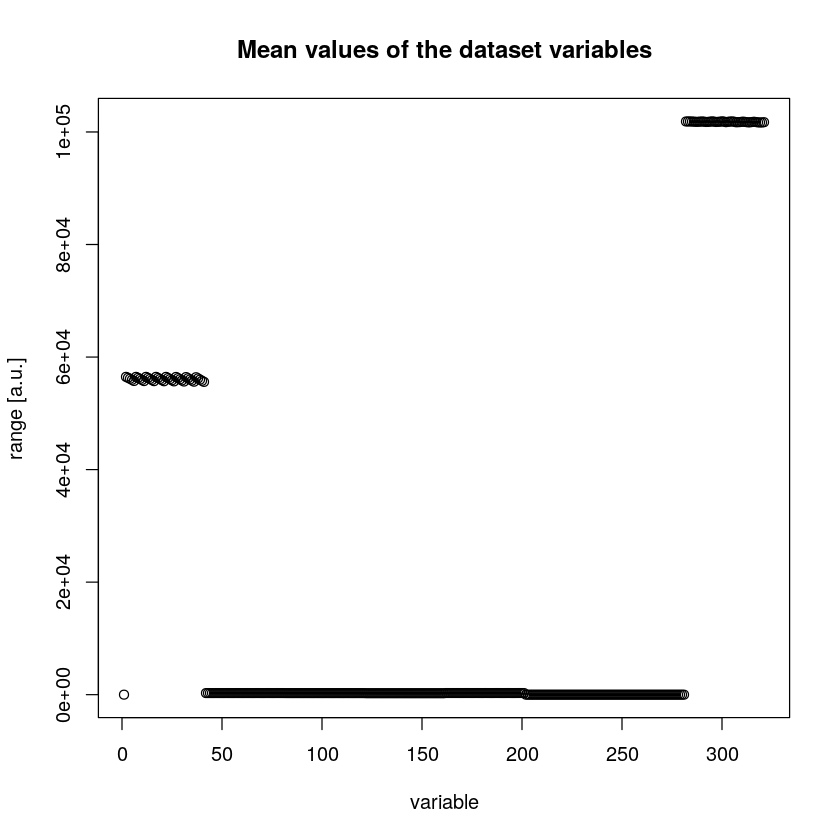

In [3]:
# Miro el rango de las variables
plot(1:321,apply(meteo,2,mean),
    xlab = "variable",
    ylab = "range [a.u.]",
    main = "Mean values of the dataset variables")

Cargo las librerias necesarias para hacer una *principal component analysis*

In [4]:
# Load the libraries for PCA
library("FactoMineR")
library("factoextra")

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



### Saco las componentes principales, sin escalar las variables e incluiendo la variable objetivo

In [5]:
# Busco las componentes principales
meteo.pca <- prcomp(meteo)

In [6]:
# Pinto la varianza explicada por cada componente
eigenvalues <- get_eig(meteo.pca)
eigenvalues

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,"55659101,935","71,628313979","71,62831"
Dim.2,"13791779,837","17,748794036","89,37711"
Dim.3,"3463992,284","4,457849989","93,83496"
Dim.4,"2556212,925","3,289618690","97,12458"
Dim.5,"795215,893","1,023372129","98,14795"
Dim.6,"562330,224","0,723668986","98,87162"
Dim.7,"216368,035","0,278446418","99,15006"
Dim.8,"167058,031","0,214988828","99,36505"
Dim.9,"114481,672","0,147327730","99,51238"


In [7]:
# Pinto la composición de cada componente principal
# en terminos de las variables
meteo.var <- get_pca(meteo.pca)
head(meteo.var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,⋯,Dim.312,Dim.313,Dim.314,Dim.315,Dim.316,Dim.317,Dim.318,Dim.319,Dim.320,Dim.321
y,"4,973872e-06","9,394439e-06","4,500889e-05","2,475052e-05","0,0002638008","0,0001797239","3,452958e-07","3,110981e-06","0,0002288954","0,0002179048",⋯,"1,563441e-13","9,630988e-13","5,949008e-14","3,278221e-13","1,621025e-12","4,643880e-13","1,208670e-12","2,243267e-12","7,151822e-13","9,257767e-14"
X1,"1,575959e+00","1,954718e-02","5,187316e+00","1,742858e+00","0,3372862563","0,7333849035","1,015937e+01","1,651255e+00","2,6477191023","0,0045715346",⋯,"1,205802e-11","7,266243e-12","1,896551e-12","1,109885e-12","3,517749e-13","1,384201e-13","4,596566e-13","5,421356e-13","2,547923e-13","5,530746e-14"
X2,"1,849147e+00","2,002132e-02","5,540281e+00","4,663866e-01","0,3681753155","0,5076607532","5,229383e+00","3,732499e+00","0,3267360261","0,0531303749",⋯,"1,425169e-11","1,450981e-11","8,665231e-12","7,902516e-14","1,780901e-12","1,747815e-12","1,609144e-12","1,402177e-12","1,021913e-12","3,806073e-14"
X3,"2,082654e+00","1,636389e-01","5,051342e+00","8,268331e-02","0,2226894136","0,2444250450","5,409152e-01","6,128738e+00","2,8484246283","0,0770786730",⋯,"1,904859e-12","4,651322e-13","8,448678e-12","3,543296e-13","8,161572e-12","6,259289e-13","3,825545e-13","1,873417e-12","4,492359e-12","5,159071e-14"
X4,"2,228396e+00","3,901357e-01","3,922891e+00","2,179590e+00","0,0212708709","0,0584795788","9,593101e-01","7,696449e+00","0,8616052273","0,0344009966",⋯,"1,507426e-12","6,579486e-12","1,335470e-11","9,753866e-14","9,250501e-13","1,294426e-12","2,503759e-13","2,706215e-12","4,674348e-12","5,837660e-13"
X5,"2,247589e+00","6,069066e-01","2,560462e+00","7,461982e+00","0,1154593107","0,0082278691","5,335626e+00","7,653079e+00","2,5624429968","0,0001027591",⋯,"1,995035e-13","1,684167e-12","9,125399e-12","2,313223e-17","1,281782e-13","1,260457e-12","1,975592e-12","5,877210e-13","2,106373e-12","2,401036e-13"


In [8]:
# Contribución de la variable objetivo a la primera componente principal
print(paste("La contribución de la variable objetivo a la primera componente principal es:",
            format(round(meteo.var$contrib[1,1],6), nsmall = 6)))

[1] "La contribución de la variable objetivo a la primera componente principal es: 5e-06"


In [9]:
# Componente principal que recibe la contribución máxima de
# la variable objetivo

best.contrib <- which(meteo.var$contrib[1,] == max(meteo.var$contrib[1,]))

print(paste("La contribución máxima de la variable objetivo es a la componente principal",
            best.contrib,
            ". Hasta dicha componente principal se explica el",
            format(round(eigenvalues$cumulative.variance.percent[best.contrib],4), nsmall = 2),"%",
           "de la varianza"))

[1] "La contribución máxima de la variable objetivo es a la componente principal 74 . Hasta dicha componente principal se explica el 99,9997 % de la varianza"


Considerando los resultados de las dos celdas anteriores, parece que la variable objetivo no es capaz de explicar practicamente nada de la varianza del dataset, y podría ser descartada.

Eso parece un artifacto debido a que las variables no han sido normalizadas y por eso el metodo PCA asigna gran importancia a variables con rangos elevados:
- alturas (~$10^4$ m);
- presiones (~$10^4$ Pa)

Prefieriendolas a variables como la cantidad de lluvia cuyo rango es de ~$10^0$ mm.



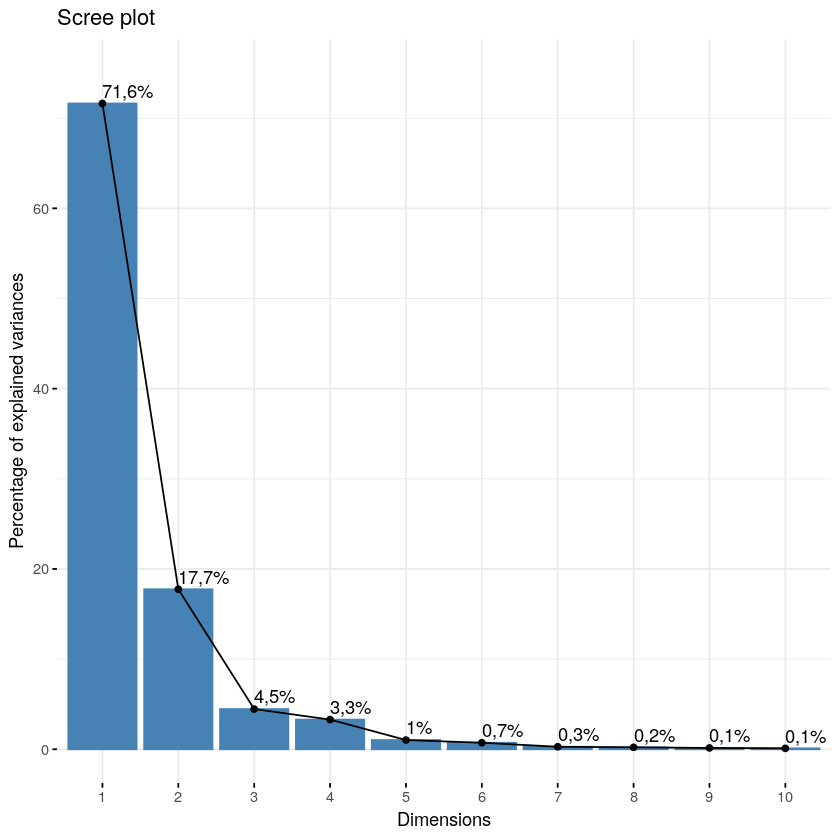

In [10]:
# Plot del porcentage de varianza explicado por cada una de
# las primeras 10 componentes principales
fviz_screeplot(meteo.pca, addlabels = TRUE, ylim = c(0, 75))

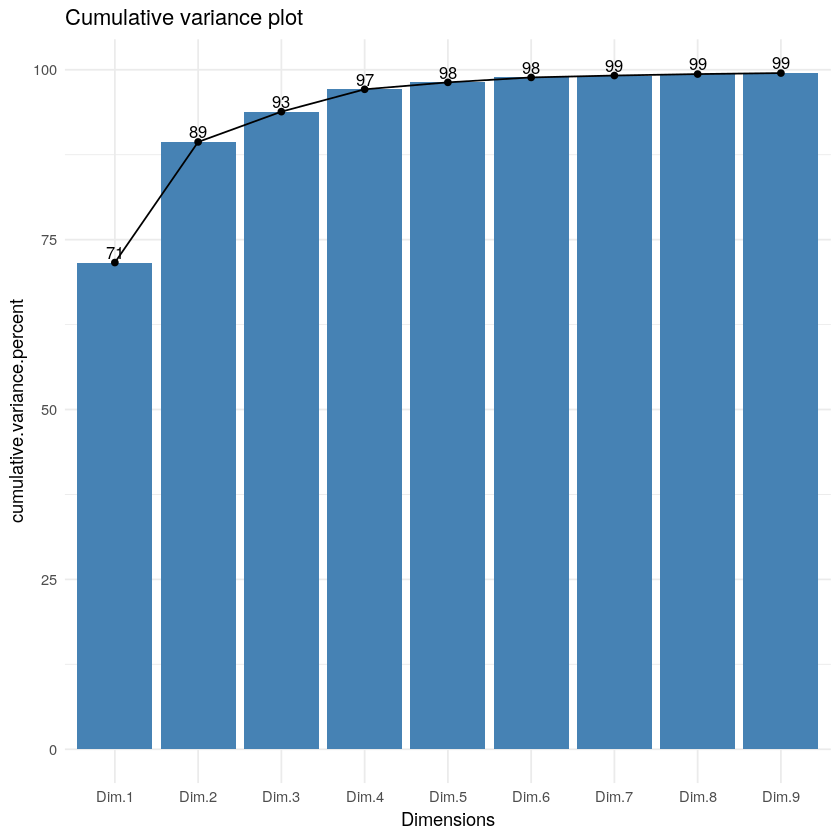

In [11]:
# Plot del porcentage de varianza cumulada explicado por 
# las primeras 9 componentes principales

plot.eigenvalues <- eigenvalues[1:9,]
plot.eigenvalues$Dimensions <- row.names(plot.eigenvalues)

ggplot(data=plot.eigenvalues, aes(x=Dimensions, y = cumulative.variance.percent, group=1)) + 
        geom_bar(stat="identity", fill="steelblue") +
        geom_text(aes(label=floor(cumulative.variance.percent)), vjust=-0.3, size=3.5) +
        geom_line(color="black") +
        geom_point() + 
        ggtitle("Cumulative variance plot") +
        theme_minimal()

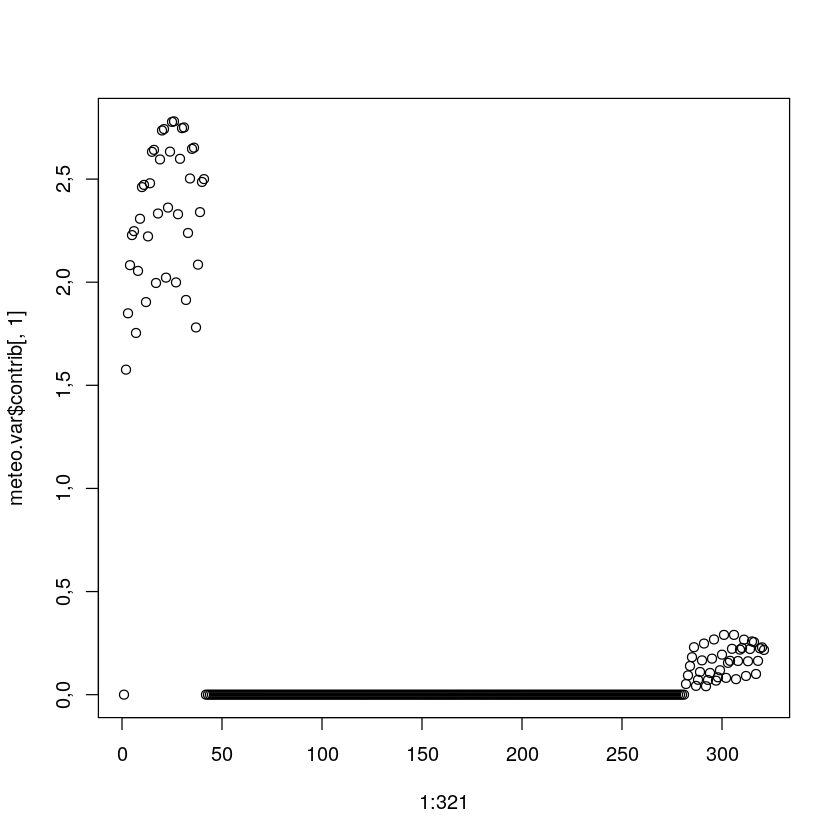

In [12]:
# Contribución de cada variable a la primera componente principal
plot(1:321,meteo.var$contrib[,1])

El plot de la contribucción de cada variable del espacio origin a la primera componente principal confirma que la normalización es un parametro clave cuando se opera una PCA. Se observa que las variables que contribuyen considerablemente son las que presentan mayor rango:
- Altura geopotencial en 500 hPa (columnas 2:41);
- Presión al nivel del mar (columnas 282:321).

### Saco las componentes principales,escalando las variables e incluiendo la variable objetivo

Parece evidente que una analisis de componente principales es sensible al rango de las variables del dataset.

Ya que el objetivo es entender cuales son las variables que explican la mayor parte de la varianza del dataset, independientemente del rango, vamos a repetir el ejercicio anterior, pero normalizando las variables.

In [13]:
# Busco las componentes principales
meteo.pca.scale <- prcomp(meteo, scale. = T)

In [14]:
# Pinto la varianza explicada por cada componente
eigenvalues.scale <- get_eig(meteo.pca.scale)
eigenvalues.scale

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,"186,3477415","58,0522559","58,05226"
Dim.2,"50,8560817","15,8430161","73,89527"
Dim.3,"12,5584062","3,9122761","77,80755"
Dim.4,"8,9703826","2,7945117","80,60206"
Dim.5,"7,7530408","2,4152775","83,01734"
Dim.6,"7,0236376","2,1880491","85,20539"
Dim.7,"5,4831912","1,7081592","86,91355"
Dim.8,"4,6532328","1,4496052","88,36315"
Dim.9,"3,2313884","1,0066630","89,36981"


In [15]:
# Pinto la composición de cada componente principal
# en terminos de las variables
meteo.var.scale <- get_pca(meteo.pca.scale)
head(meteo.var.scale$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,⋯,Dim.312,Dim.313,Dim.314,Dim.315,Dim.316,Dim.317,Dim.318,Dim.319,Dim.320,Dim.321
y,"0,01068821","0,1481743","0,409296737","0,05626072","0,01623840","0,792168138","0,0250521714","0,69790165","0,697849413","0,03161560",⋯,"2,237226e-07","1,286247e-09","2,938847e-07","1,209608e-07","1,485807e-08","1,979356e-07","1,713411e-08","1,221860e-08","6,538198e-08","2,518098e-09"
X1,"0,32967378","0,3751500","0,003521151","1,08009249","0,18075169","0,314488693","0,0016369550","0,24096378","0,005042945","0,34950972",⋯,"7,777296e-02","1,068744e-01","8,681547e-01","1,433569e-01","8,072046e-03","1,983905e-01","6,764049e-03","8,671875e-02","1,306187e-01","1,131101e-02"
X2,"0,30982013","0,5400883","0,013331685","1,09103897","0,03021082","0,187355388","0,0003464903","0,03752520","0,013080701","0,30556854",⋯,"2,909756e-01","4,237286e-01","3,499679e+00","7,077044e-02","4,551482e-03","1,146951e-01","8,981676e-02","5,972941e-01","5,249825e-01","1,033596e-01"
X3,"0,28721888","0,6817707","0,037136982","0,90123571","0,02682396","0,071153722","0,0001308805","0,02896342","0,044093191","0,22138235",⋯,"4,548429e-01","1,094653e+00","2,569606e+00","6,005903e-01","4,639561e-03","2,993693e-01","1,546034e-01","1,493890e+00","2,418529e-01","2,683617e-01"
X4,"0,25893709","0,7623370","0,083838768","0,59147460","0,29705941","0,009772165","0,0013339786","0,29116858","0,123125140","0,13206158",⋯,"7,382581e-01","3,701578e+00","8,421939e-02","2,062842e-02","9,782027e-03","2,876985e-01","5,761512e-02","1,572654e+00","2,355899e-02","2,721858e-01"
X5,"0,22439603","0,7564979","0,158458134","0,29112473","0,84317813","0,002560493","0,0018319171","0,71326140","0,263361613","0,06108745",⋯,"3,171919e-01","1,596047e+00","1,992596e-01","2,839820e-01","5,098566e-03","1,171771e-01","1,201050e-03","4,915030e-01","1,541826e-01","7,214683e-02"


In [16]:
# Contribución de la variable objetivo a la primera componente principal
print(paste("La contribución de la variable objetivo a la primera componente principal es:",
            format(round(meteo.var.scale$contrib[1,1],4), nsmall = 4)))

[1] "La contribución de la variable objetivo a la primera componente principal es: 0,0107"


In [17]:
# Componente principal que recibe la contribución máxima de
# la variable objetivo

best.contrib.scale <- which(meteo.var.scale$contrib[1,] == max(meteo.var.scale$contrib[1,]))

print(paste("La contribución máxima de la variable objetivo es a la componente principal",
            best.contrib.scale,
            ". Hasta dicha componente principal se explica el",
            format(round(eigenvalues.scale$cumulative.variance.percent[best.contrib.scale],4), nsmall = 2),"%",
           "de la varianza"))

[1] "La contribución máxima de la variable objetivo es a la componente principal 23 . Hasta dicha componente principal se explica el 95,6251 % de la varianza"


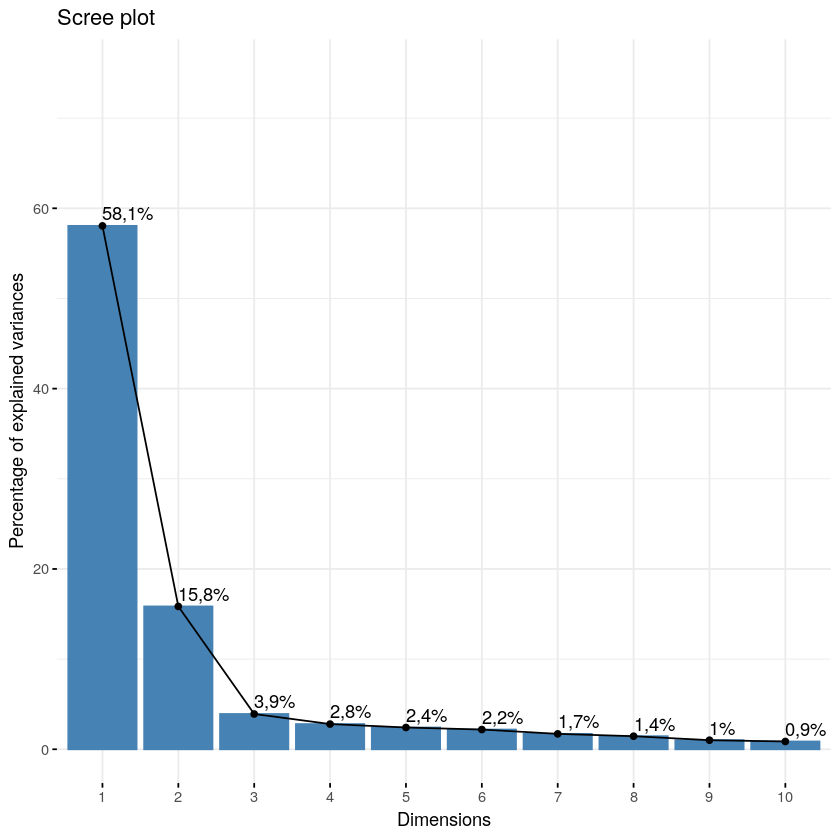

In [18]:
# Plot del porcentage de varianza explicado por cada una de
# las primeras 10 componentes principales
fviz_screeplot(meteo.pca.scale, addlabels = TRUE, ylim = c(0, 75))

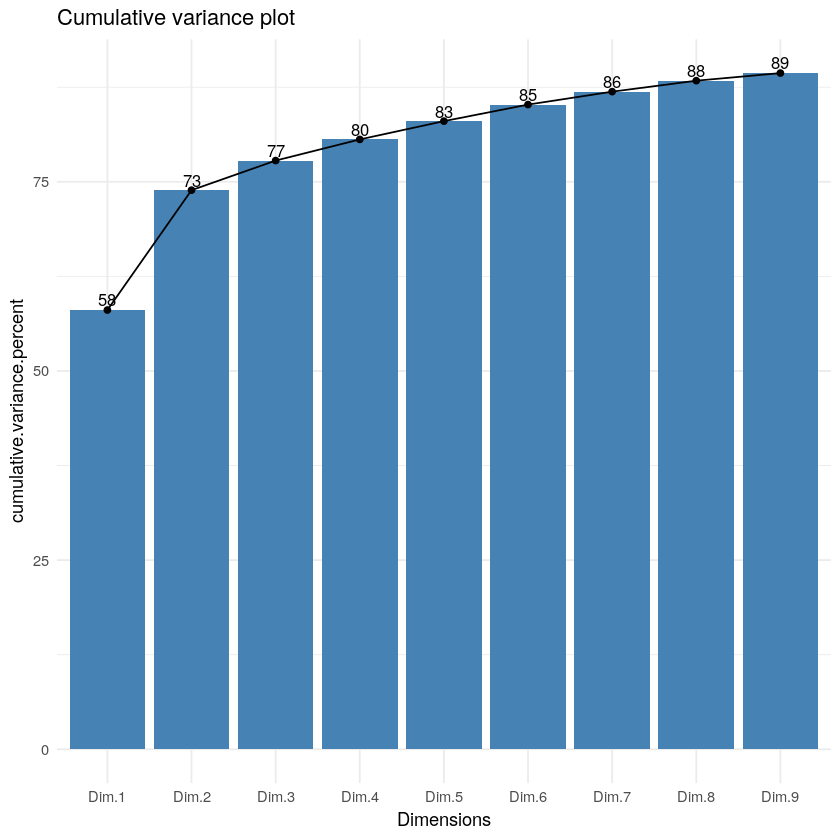

In [19]:
# Plot del porcentage de varianza cumulada explicado por 
# las primeras 9 componentes principales

plot.eigenvalues.scale <- eigenvalues.scale[1:9,]
plot.eigenvalues.scale$Dimensions <- row.names(plot.eigenvalues.scale)

ggplot(data=plot.eigenvalues.scale, aes(x=Dimensions, y = cumulative.variance.percent, group=1)) + 
        geom_bar(stat="identity", fill="steelblue") +
        geom_text(aes(label=floor(cumulative.variance.percent)), vjust=-0.3, size=3.5) +
        geom_line(color="black") +
        geom_point() + 
        ggtitle("Cumulative variance plot") +
        theme_minimal()

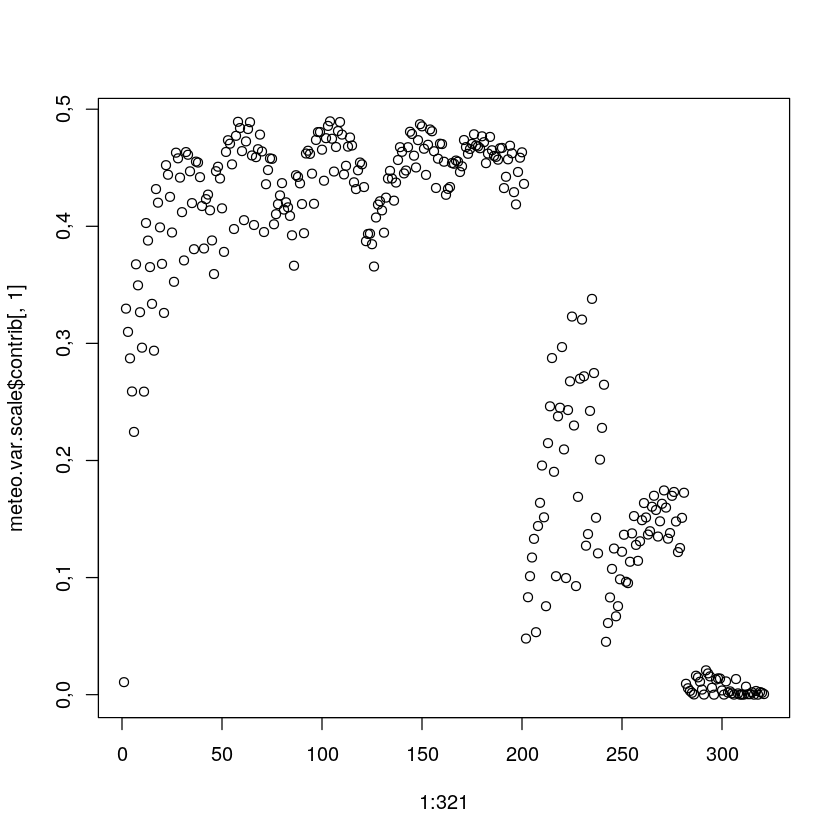

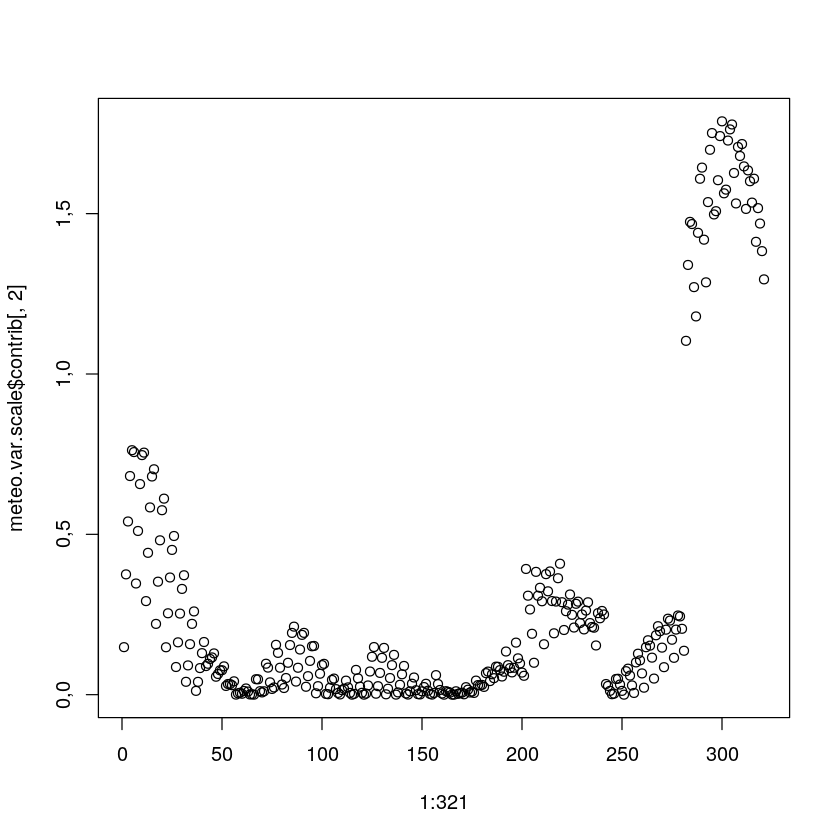

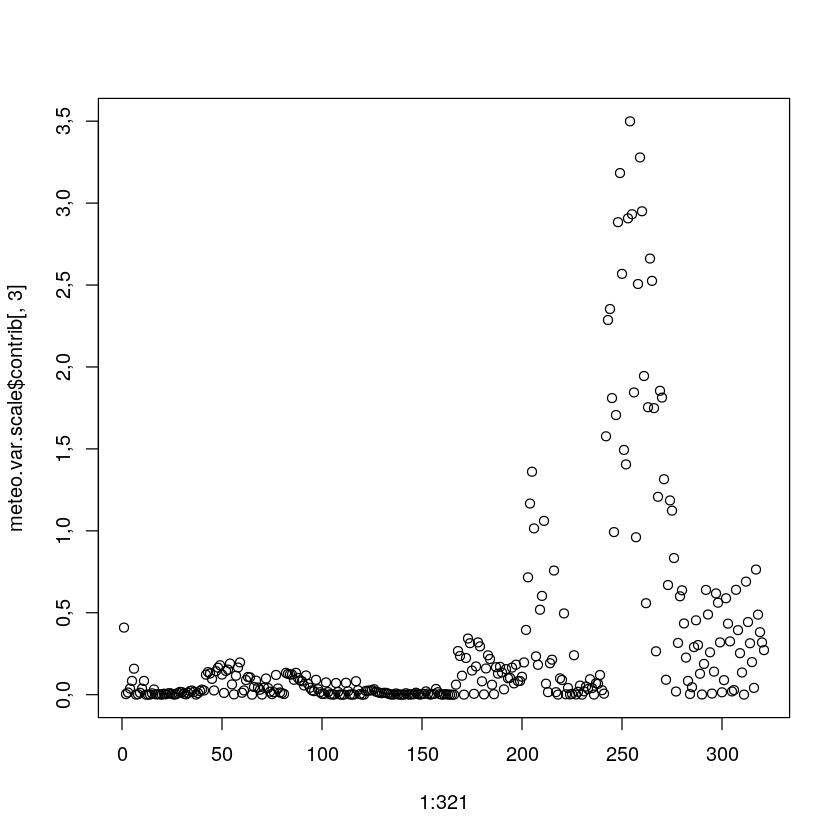

In [20]:
# Contribución de cada variable a las primeras tres componentes principales
plot(1:321,meteo.var.scale$contrib[,1])
plot(1:321,meteo.var.scale$contrib[,2])
plot(1:321,meteo.var.scale$contrib[,3])

Escalando correctamente las variables, se observa que no hay dependencia del rango inicial en la composición de las componentes principales.

Podemos ver en la gráfica anterior, que en la primera componente principal hay una contribución importante por las primeras ~200 variables (excluyendo la variable objetivo), mientras que en la segunda componente principal adquieren importancia las que antes tenían un peso más bajo. 

Esto demuestra que todas las variables contribuyen a la varianza del dataset, contrariamente a cuanto visto sin esclar.

Se nota también que ahora la variable objetivo sigue teniendo una contribución pequeña en general, aunque ya se note su efecto en la tercera componente.

### Punto 2 (3 puntos):

A continuación, consideraremos la serie de precipitación discretizada a partir del valor 1 mm, que es el estándar definido para establecer los días en que ha llovido. El objetivo de este apartado es predecir la ocurrencia de precipitación en Lisboa a partir de los predictores antes definidos. Para ello consideraremos, por un lado, las componentes principales obtenidas estandarizando los datos originales y, por otro lado, el método `KNN`. Dividir la muestra en dos subconjuntos, el primero (20 primeros años) lo utilizaremos para calibrar el modelo y obtener su configuración óptima, mientras que el segundo (10 últimos años) lo utilizaremos como test independiente de cara a comparar diferentes métodos.

* Considerad diferentes umbrales de varianza explicada y el número de PCs asociado (p.e. 40%, 60%, 80% y 90%) y obtend el valor óptimo de `K` en cada caso rastreando valores entre 1 y 15, ¿cómo cambia el valor óptimo? En base a los resultados obtenidos, ¿cuantas PCs considerarías para entrenar el modelo? (`Nota:` ver práctica de `KNN`)
* Para la configuración óptima calibrada con el conjunto de entrenamiento realizad la predicción sobre el conjunto de test y estimad los errores cometidos sobre este conjunto.

In [37]:
# converto la variable objetivo en categórica
rain = ifelse(meteo$y < 1, 0, 1)
meteo$rain = as.factor(rain)
print(paste(meteo$rain[1:10],meteo$y[1:10]))

 [1] "1 10,9" "0 0,6"  "1 13"   "0 0"    "0 0"    "1 1,2"  "1 1,1"  "0 0"   
 [9] "0 0"    "0 0,7" 


In [48]:
N <- nrow(meteo)

# creo el dataset de 'entrenamiento'
meteo.calib <- meteo[1:7300,]

# creo el dataset de 'test'
meteo.test <- meteo[7301:N,]

[1] 3658

### Punto 3 (2 puntos):

Repetid el experimento anterior considerando la precipitación discretizada a partir del valor 20 mm, que es el estándar definido para establecer los días en que ha llovido de forma intensa.

* ¿Cómo cambian los valores óptimos de `K` y de número de PCs? 
* ¿Cómo cambian los errores sobre el conjunto de test en este caso?
* En caso de existir diferentes significativas en ambos casos, ¿a qué crees que puede ser debido? ¿La frecuencia en la muestra del evento a predecir puede influir en la calidad de la predicción?

### Punto 4 (2 puntos):

Considerando el número de PCs óptimo obtenido en el apartado anterior, predecid el conjunto de test utilizando en este caso la regresión logística como método de clasificación (`Nota:` ver `Práctica Clasificacion Lineal` en el Moodle de la asignatura de Estadística o en la de Minería de Datos). 

* Comparad los resultados obtenidos utilizando ambos métodos para la predicción de la ocurrencia de precipitación y de precipitación intensa (`Nota:` considerar, por ejemplo, la curva ROC para la comparación), ¿alguno de los métodos se comporta mejor que el otro de forma sistemática?